Goals:
- Set up Python and Jupyter
    - Show Colab
    - Show VS Code
    - Show miniconda
    - Set up conda environment
- Get data
    - UCI, pick regression task
    - Put data on GitHub
    - Show how to access data in Colab
- Load data
    - Load with numpy
    - Load with pandas
- Show data
    - Matplotlib
    - Pick a couple features
- Regression
    - Derive gradient
    - Gradient descent

# Set up Python & Jupyter

### Google Colab: 
- runs on the cloud
- has most popular libraries
- has good support for widgets (better for data visualization)
- [https://colab.research.google.com](https://colab.research.google.com)
- cell magic and shell commands for advanced control (installing other things, [etc.](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.05-IPython-And-Shell-Commands.ipynb#scrollTo=WclyQSP7cvmP))

### VSCode: 
- runs on the local system (though it can run remotely)
- better for larger projects with multiple Python modules
- I manage the environment
- [https://code.visualstudio.com/](https://code.visualstudio.com/)

### Miniconda
- Set up Python environments without messing with your system environment
- No need for it's larger sibling, conda
- [https://www.anaconda.com/docs/getting-started/miniconda/main](https://www.anaconda.com/docs/getting-started/miniconda/main)

### Set up an environment
- Terminal
- (ahead of time) `conda deactivate && clear`
- `conda create -n recitation python=3.12 jupyter numpy pandas matplotlib`
- `conda activate recitation`
- Getting stuff for an environment into a text file: `conda env export > env.yaml`
- Removing an environment: `conda env remove -n recitation`

# Get Data

### UCI's Machine Learning Repository: 
- [https://archive.ics.uci.edu](https://archive.ics.uci.edu)
- View datasets
- Find a dataset for regression that looks fun
    - Task: Regression
    - Data type: Multivariate
- Download

### Put data on GitHub
- [https://github.com](https://github.com)
- Create repository (empty)
- Copy repo URL
- VS Code terminal `cd ~/Developer`
- `git clone <repo URL>`
- Open in VS Code
- Into the repo, put: this notebook, the README.md, and the data folders
    - Notebooks are optional. I recommend using Colab, but will set up both here.
- Get data on GitHub
    - `cd new repo`
    - `git branch -M main`
    - `git add .`
    - `git commit -m "Initial commit"`
    - `git push -u origin main`
    - Publish branch
- View data on GitHub

### Data in Colab
- In a code cell: `!wget <URL>` (from raw link)
- Browser
    - Open data in side panel
- Edit cell:
```
%%capture
!wget <URL>
```
- New cell:
```
from pathlib import Path
DATA_PATH = "imports-85.data"
Path(DATA_PATH).exists()
```

# Load Data

In [1]:
# Check existence of data
from pathlib import Path
DATA_PATH = "automobile/imports-85.data"
Path(DATA_PATH).exists()

True

### Numpy

In [2]:
import numpy as np

In [4]:
# np.loadtxt(DATA_PATH)
try:
    np.loadtxt(DATA_PATH)
except ValueError as e:
    print(f"{e}")

could not convert string '3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi, to float64 at row 0, column 1.


In [5]:
data = np.genfromtxt(DATA_PATH, delimiter=',', missing_values='?')

In [6]:
data

array([[ 3.0000e+00,         nan,         nan, ...,  2.1000e+01,
         2.7000e+01,  1.3495e+04],
       [ 3.0000e+00,         nan,         nan, ...,  2.1000e+01,
         2.7000e+01,  1.6500e+04],
       [ 1.0000e+00,         nan,         nan, ...,  1.9000e+01,
         2.6000e+01,  1.6500e+04],
       ...,
       [-1.0000e+00,  9.5000e+01,         nan, ...,  1.8000e+01,
         2.3000e+01,  2.1485e+04],
       [-1.0000e+00,  9.5000e+01,         nan, ...,  2.6000e+01,
         2.7000e+01,  2.2470e+04],
       [-1.0000e+00,  9.5000e+01,         nan, ...,  1.9000e+01,
         2.5000e+01,  2.2625e+04]], shape=(205, 26))

In [12]:
data[:, 0]

array([ 3.,  3.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  3.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  3.,  3.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  0., -1., -1.,  0., -1., -1.,  3.,  0.,  1.,  1.,  2.,  2.,
        2.,  1.,  3.,  3.,  3.,  3.,  3.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
        3.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1., -1.,  3.,  3.,  3.,  3.,  3.,  1.,
        0.,  2.,  3.,  2.,  3.,  2.,  3.,  2.,  2.,  2.,  2.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2., -1., -1., -1., -1., -1.,  3.,  3., -1

### Pandas

In [7]:
import pandas as pd

In [9]:
df = pd.read_csv(DATA_PATH, header=None, na_values='?')

In [17]:
data = df.iloc[:, [16, 23, 24, 25]]
data.columns = ["wt", "city-mpg", "hwy-mpg", "price"]
data

,wt,city-mpg,hwy-mpg,price
0,130,21,27,13495.0
1,130,21,27,16500.0
2,152,19,26,16500.0
3,109,24,30,13950.0
4,136,18,22,17450.0
...,...,...,...,...
200,141,23,28,16845.0
201,141,19,25,19045.0
202,173,18,23,21485.0
203,145,26,27,22470.0


Let's see how these relate:
- Engine size (16) 
- City mpg (23)
- Highway mpg (24)
- Price (25)

# Viewing data

In [14]:
import matplotlib.pyplot as plt

Pick a pair of features

Text(0.5, 0, 'City MPG')

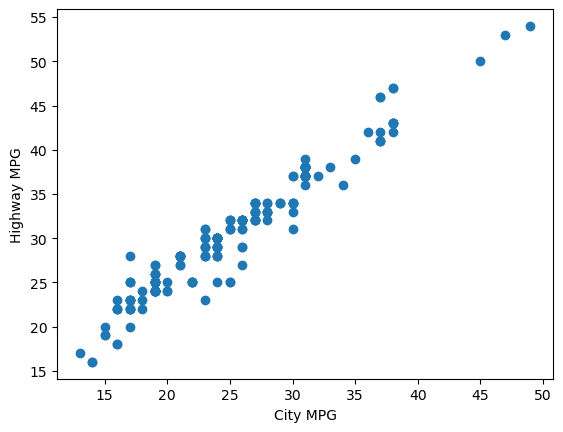

In [ ]:
x_label = "city-mpg"
y_label = "hwy-mpg"
plt.scatter(data[x_label], data[y_label])  # Values here
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")

# Regression

Dr. Ruozzi discussed linear regression in lecture. 

What's the goal of supervised learning? (Slide 10)

What hypothesis space do we use for linear regression? (Slide 13)

What's a loss function? Which loss function is suggested? (Slide 16)

How do we use a loss function? (Slide 16)

What's an alternative to an exact solution? (Slide 21)

Dr. Ruozzi discussed linear regression in lecture. The hypothesis space for linear regression is $$f(x) = ax + b$$

We're going to predict some $\hat{y} = f(x)$ and we want $\hat{y}$ to be as close to $y$ for each data point as we can make it. To do this, we'll use a simple loss function: 
$$L(f) = \frac{1}{M} \sum_m(\hat{y}^{(m)} - y^{(m)})^2$$

If we let $\hat{y} = f(x)$, our loss function is now $$L(f) = \frac{1}{M}\sum_m(ax^{(m)} + b - y^{(m)})^2$$

We want the best model, with the best values for $a$ and $b$. This happens when we minimize the loss function $$\min_{a,b}\frac{1}{M}\sum_m (ax^{(m)} + b - y^{(m)})^2$$

Instead of finding the exact solution, we can work our way there using gradient descent. We define $\theta=(a,b)$ and iterate until convergence: $$\theta_{t+1} = \theta_t - \gamma_t \nabla J(\theta_t)$$


## From Theory to Practicality

How do we use that alternative?

Implement it!

In [23]:
data.shape

(205, 4)

In [27]:
np.arange(5) - 2

array([-2, -1,  0,  1,  2])

In [35]:
# Operation with vectors
x = data[x_label]
y = data[y_label]
a = 1
b = 0

M = data.shape[0]

# IMPLEMENTATION OF PARTIAL w.r.t $a$ HERE
(x * (a * x + b - y)).to_numpy()

array([-126, -126, -133, -144,  -72, -114, -114, -114,  -51,  -96, -138,
       -138, -147, -147, -100,  -96,  -96,  -75, -282, -190, -190, -148,
       -217, -144, -217, -217, -217, -144, -144,  -95, -245, -217, -152,
       -120, -120, -120, -120, -162, -162, -162, -162,  -96, -150, -120,
       -190, -190, -120,  -60,  -60,  -52,  -30, -217, -217, -217, -217,
       -102, -102, -102, -112, -156, -156, -156, -156, -216, -156, -152,
       -248,  -66,  -66,  -66,  -66,  -32,  -32,  -28,  -28,  -95, -148,
       -217, -217, -144, -161, -175,  -95,  -95,  -95, -175, -175, -161,
       -161, -186, -225, -186, -186, -186, -186, -186, -186, -186, -186,
       -189, -189,  -85,  -85, -114, -114, -102, -114,  -95, -140,  -95,
          0,  -95, -140,  -95,    0,  -95, -140, -108, -148, -144, -217,
       -217, -217, -144,  -95, -152, -136, -136, -136, -187, -184, -184,
       -147, -147, -147, -147, -133, -133, -155, -130, -130, -160, -140,
       -156,  -24, -120, -112, -150, -138,    0, -1

In [29]:
# Check that this is a reasonable first value
x[0], y[0]

(np.int64(21), np.int64(27))

$$\theta_{t+1} = \theta_t - \gamma_t\nabla J(\theta_t)$$

In [36]:
# Define functions of (a, b, x, y)
M = data.shape[0]

def grad_a(a, b, x, y):
    return 2 / M * np.sum(x * (a * x + b - y))

def grad_b(a, b, x, y):
    return 2 / M * np.sum(a * x + b - y)


In [49]:
# Define hyperparameters (l.r., init)
GAMMA = 2e-4
Theta_0 = (2, 2)

In [54]:
# Implement training loop
theta_s =[Theta_0]
for _ in range(2000):
    a, b = theta_s[-1]
    a_new = a - GAMMA * grad_a(a,b,x,y)
    b_new = b - GAMMA * grad_b(a,b,x,y)
    theta_s.append((a_new, b_new))

In [45]:
theta_s

[(2, 2),
 (np.float64(1.9764563902439025), np.float64(1.999132487804878)),
 (np.float64(1.9535527371420252), np.float64(1.9982887606443782)),
 (np.float64(1.931271645342458), np.float64(1.9974681719913137)),
 (np.float64(1.9095961923351106), np.float64(1.9966700928924495)),
 (np.float64(1.8885099155988871), np.float64(1.9958939114908074)),
 (np.float64(1.867996800098231), np.float64(1.9951390325609535)),
 (np.float64(1.8480412661195371), np.float64(1.9944048770569178)),
 (np.float64(1.8286281574381966), np.float64(1.9936908816724037)),
 (np.float64(1.8097427298072857), np.float64(1.9929964984129505)),
 (np.float64(1.7913706397591558), np.float64(1.9923211941797254)),
 (np.float64(1.7734979337114205), np.float64(1.9916644503646304)),
 (np.float64(1.7561110373690627), np.float64(1.9910257624564132)),
 (np.float64(1.739196745414617), np.float64(1.990404639657486)),
 (np.float64(1.722742211478592), np.float64(1.9898006045111594)),
 (np.float64(1.706734938382518), np.float64(1.9892131925390

In [52]:
# Get final model
a_final, b_final = theta_s[-1]

# Apply model to even intervals of x
pred_x = np.linspace(x.min(), x.max(), 10)
pred_y = a_final * pred_x + b_final

Text(0.5, 0, 'City MPG')

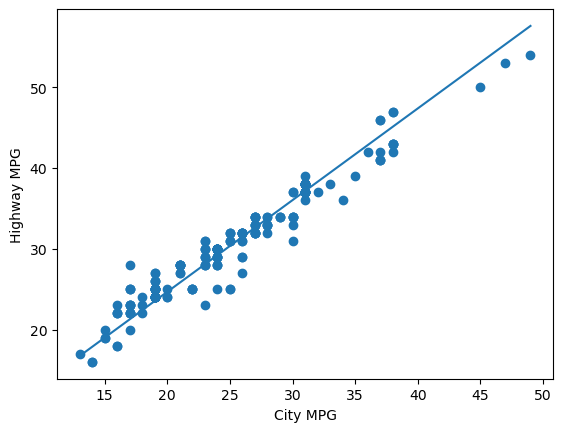

In [53]:
# Show result
plt.scatter(data[x_label], data[y_label])  # Values here
plt.plot(pred_x, pred_y)
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")

Text(0.5, 0, 'City MPG')

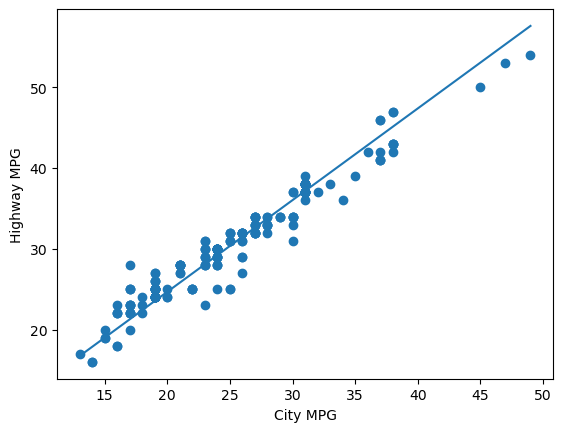

In [55]:
# Show result
plt.scatter(data[x_label], data[y_label])  # Values here
plt.plot(pred_x, pred_y)
plt.ylabel("Highway MPG")
plt.xlabel("City MPG")